## Problem statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education wants to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.

## Steps
- 1 Importing libraries

- 2 Read the data

- 3 Data cleaning and prepration

- 4 EDA 

- 5 Adding dummies

- 6 Split the data into train and test

- 7 Model building


In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows",100)
pd.set_option('display.max_columns',100)

### Reading data set

In [2]:
# read the dataset
data = pd.read_csv("Leads.csv")
data.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


### Data quality check

In [3]:
# shape of data set (total number of rows and columns in a data set)
data.shape

(9240, 37)

In [4]:
data.info() # gives information about null, datatype rows and columns etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
data = data.replace("Select",np.nan)

In [7]:
data.isnull().sum()/data.shape[0]*100 # percentage of null value
# as we can see that there are more than 45% null values in some columns. so we remove that columns

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Data cleaning and prepration

In [8]:
for i in data.columns:
    print( i,data[i].unique(),"\n")# to check types of unique element in all columns

Prospect ID ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff'] 

Lead Number [660737 660728 660727 ... 579545 579538 579533] 

Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 

Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 

Do Not Email ['No' 'Yes'] 

Do Not Call ['No' 'Yes'] 

Converted [0 1] 

TotalVisits [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 11

In [9]:
for i in data.columns:
    if data[i].isnull().sum()/data.shape[0]*100>=55:
        data.drop(i,inplace=True,axis=1)# drop the missing value columns greater than equal to 55%

In [10]:
data=data.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index'
                ,'Asymmetrique Activity Score','Asymmetrique Profile Score','A free copy of Mastering The Interview'],axis=1)

In [11]:
data['Lead Quality']=data['Lead Quality'].replace(np.nan,'not sure')

In [12]:
data.isnull().sum().sort_values(ascending=False)

City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Through Recommendations                             0
Receive More Updates About Our Courses              0
Prospect ID                                         0
Newspaper                                           0
Lead Quality                                        0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
Digital Advertisement       

In [13]:
for i in data.columns:
    print(i,data[i].value_counts(),"\n\n")#check for imbalance in data set

Prospect ID 7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64 


Lead Number 660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64 


Lead Origin Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 


Lead Source Google               2868
Direct Traffic       2543
Olark Chat   

as we can see there is a high imbalance in "do not call No","search no","magazine no","newspaper article no","X education forumns no","Newspaper no","digital advertisement no","Through Recommendations No","Receive More Updates About Our Courses No","Update me on Supply Chain Content No","Get updates on DM Content No","I agree to pay the amount through cheque No"

In [14]:
data = data.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'
                 ,'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                 'What matters most to you in choosing a course','Do Not Call','Country'],axis=1)

In [15]:
data = data.drop(['Prospect ID','Lead Number'],axis =1)# drop the id columns

In [16]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,Low in Relevance,NaN,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Ringing,not sure,NaN,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [17]:
conti=[]
categ = []
for i in data.columns:
    if data[i].nunique()>=40:
        conti.append(i)
    else:
        categ.append(i)

In [18]:
conti

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

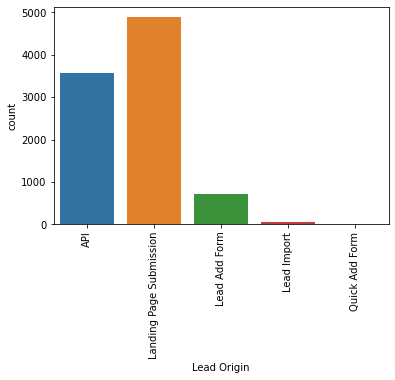

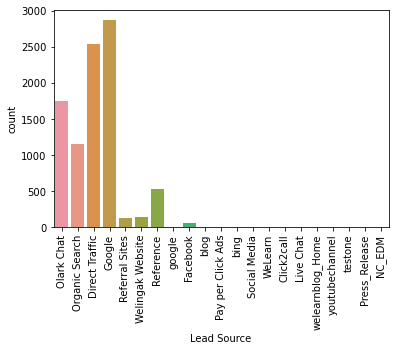

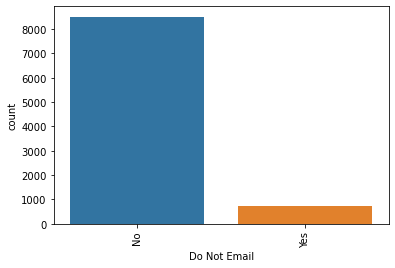

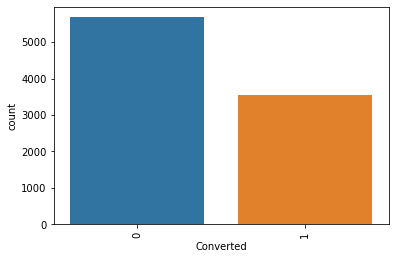

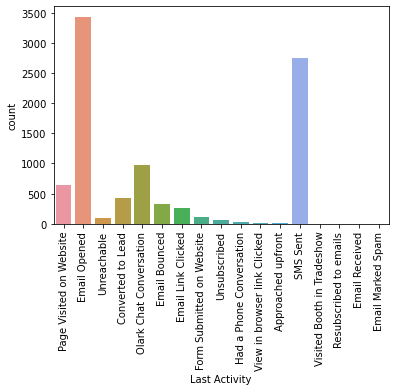

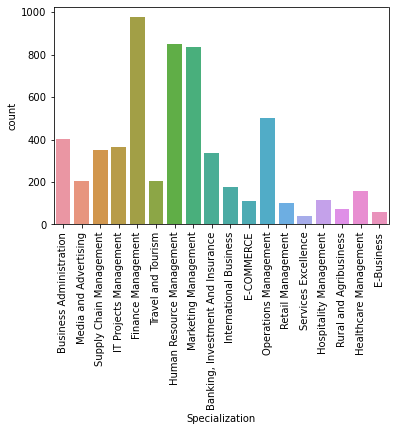

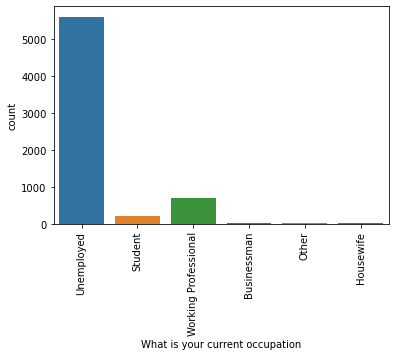

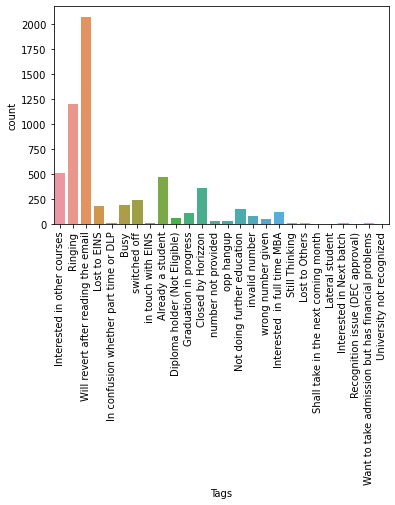

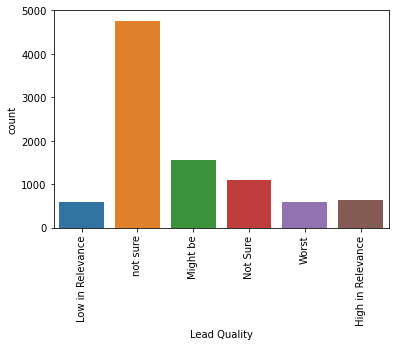

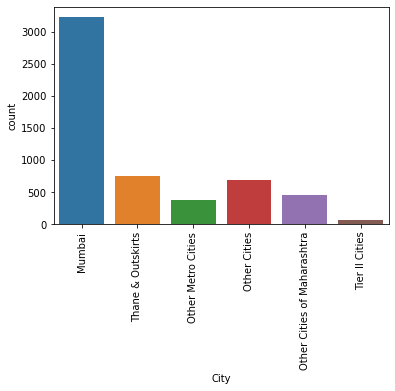

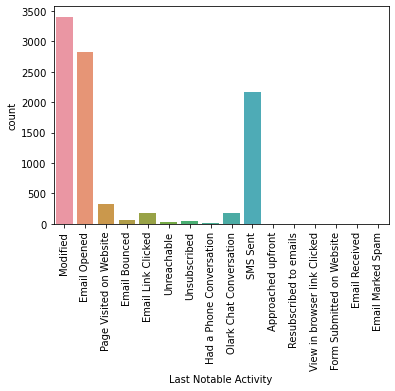

In [19]:
for i in data[categ]:
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.show()

In [20]:
data['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

#### Imputing NAN in categorical feature with mode

In [21]:
# there are some missing values in categorical columns . so we need to impute with mode value
# in city column mumbai has highest values. so impute the nan with mumbai
data['City']=data['City'].replace(np.nan,'Mumbai')
# in specialization column impute nan with Finance management
data['Specialization'] =data['Specialization'].replace(np.nan,"others")
data['Lead Source'] =data['Lead Source'].replace(np.nan,"google")
data['Last Activity'] = data['Last Activity'].replace(np.nan,'Email Opened')
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan,'Unemployed')
data['Tags'] = data['Tags'].replace(np.nan,'Will revert after reading the email')
#data['Country'] = data['Country'].replace(np.nan,'India')


In [22]:
# as we can see there are some data of Google name and some are google name
data['Lead Source']=data['Lead Source'].replace('google','Google')

In [23]:
data.isnull().sum().sort_values(ascending=False)

TotalVisits                        137
Page Views Per Visit               137
Lead Origin                          0
Lead Source                          0
Do Not Email                         0
Converted                            0
Total Time Spent on Website          0
Last Activity                        0
Specialization                       0
What is your current occupation      0
Tags                                 0
Lead Quality                         0
City                                 0
Last Notable Activity                0
dtype: int64

#### Imputing nan in continuous feature with median

In [24]:
conti

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [25]:
#imputing non in contuous feature with median value
data['TotalVisits']=data['TotalVisits'].replace(np.nan,data['TotalVisits'].median())
data['Page Views Per Visit'] = data['Page Views Per Visit'].replace(np.nan,data['Page Views Per Visit'].median())

In [26]:
data.isnull().sum().sort_values(ascending=False)

Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
Tags                               0
Lead Quality                       0
City                               0
Last Notable Activity              0
dtype: int64

## Exploratory data analysis

### Univariate analysis

####  Total visits

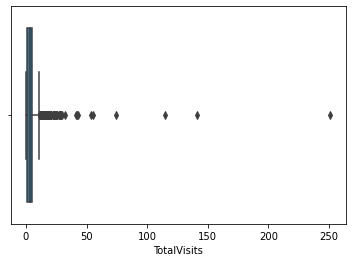

In [27]:
sns.boxplot(data['TotalVisits'])
plt.show()# as we can see there are number of outliers are there

In [28]:
percentile=data['TotalVisits'].quantile([0.05,0.95]).values
percentile

array([ 0., 10.])

In [29]:
# imputing the outliers less than 0.5 with 0.5 percentile value and outlier greater than 0.95 with 0.95 percentile value
data['TotalVisits'][data['TotalVisits']<=percentile[0]]=percentile[0]
data['TotalVisits'][data['TotalVisits']>=percentile[1]]=percentile[1]

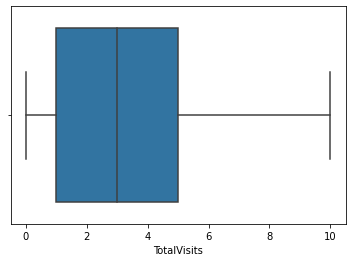

In [30]:
sns.boxplot(data['TotalVisits'])
plt.show()# as we can see all the outliers are capped properly

###  Page Views Per Visit

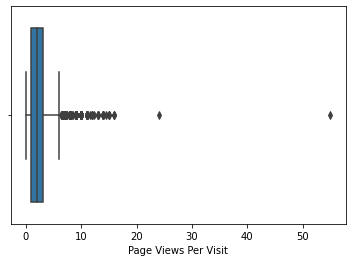

In [31]:
sns.boxplot(data['Page Views Per Visit'])
plt.show()# large umber of outliers

In [32]:
percentile1 = data['Page Views Per Visit'].quantile([0.05,0.95]).values
percentile1

array([0., 6.])

In [33]:
data['Page Views Per Visit'][data['Page Views Per Visit']<=percentile[0]]=percentile[0]
data['Page Views Per Visit'][data['Page Views Per Visit']>=percentile[1]]=percentile[1]

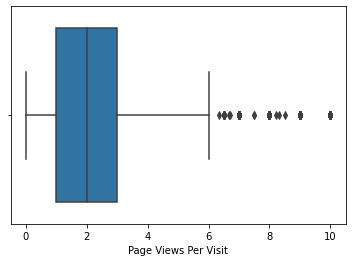

In [34]:
sns.boxplot(data['Page Views Per Visit'])
plt.show()# most of the outliers are covered

###  Total Time Spent on Website

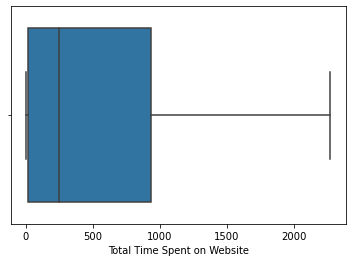

In [35]:
sns.boxplot(data['Total Time Spent on Website'])
plt.show()# high number of outliers

In [36]:
data['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [37]:
percentile2=data['Total Time Spent on Website'].quantile([0.5,0.95,0.99]).values
percentile2

array([ 248.  , 1562.  , 1840.61])

In [38]:
data['Total Time Spent on Website'][data['Total Time Spent on Website']<=percentile2[0]]=percentile2[0]
data['Total Time Spent on Website'][data['Total Time Spent on Website']>=percentile2[1]]=percentile2[1]


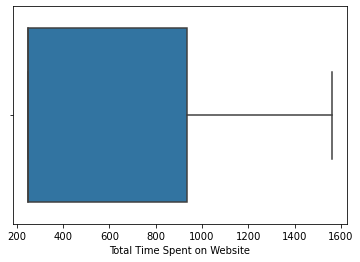

In [39]:
sns.boxplot(data['Total Time Spent on Website'])
plt.show()# there are still huge number of outliers so we leave it as it is otherwise it will affect the original data.

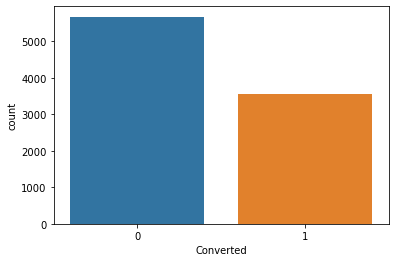

In [40]:
sns.countplot(data['Converted'])
plt.show()

## Bivariate Analysis

In [335]:
#data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
 # 'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

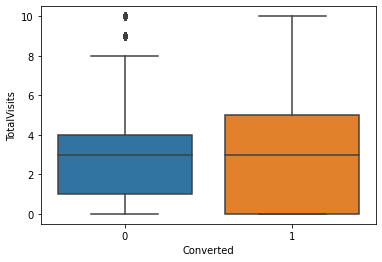

In [43]:
sns.boxplot(y='TotalVisits',x='Converted',data=data)
plt.show()# Total Visits -The average total visits for both converted and non converted people is found to be the same.


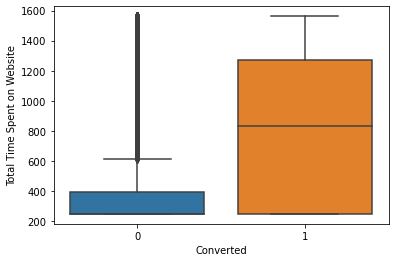

In [44]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=data)
plt.show()#Total Time Spent On The Website -The mean is found to be higher in case
#of Converted people rather than non converted people.

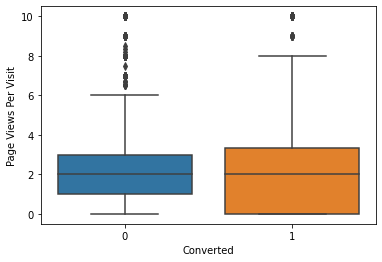

In [45]:
sns.boxplot(y='Page Views Per Visit',x='Converted',data=data)
plt.show()# Page Views Per Visit The average page views for both converted and non converted is found to be the same


### Lead source and lead origin

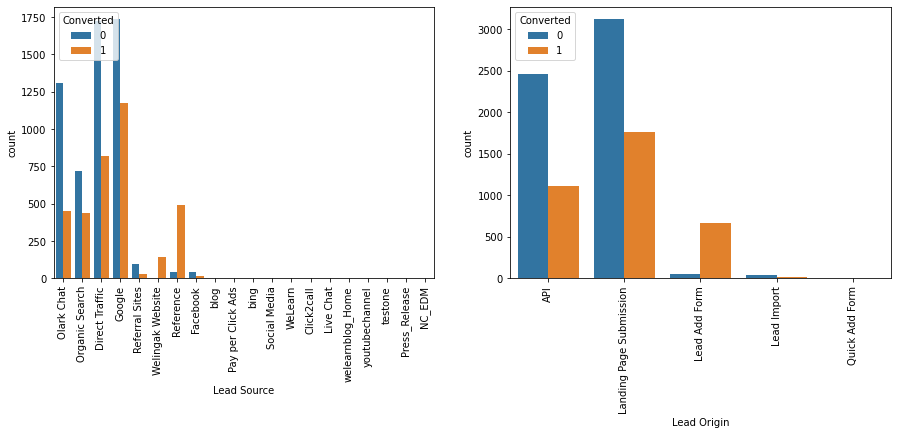

In [336]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot('Lead Source',hue='Converted',data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot('Lead Origin',hue='Converted',data=data)
plt.xticks(rotation=90)
plt.show()



As we can see that maximum leads generated by google, direct traffic
#### whereas, Lead conversion rate of reference and welingak website is high
To improve overall lead performance we must focus on Olark Chat

Lead generation rate of landing page submission is high whereas, lead convertion rate of lead add form is high.we need to focus on API

### for do not mail and  last activity

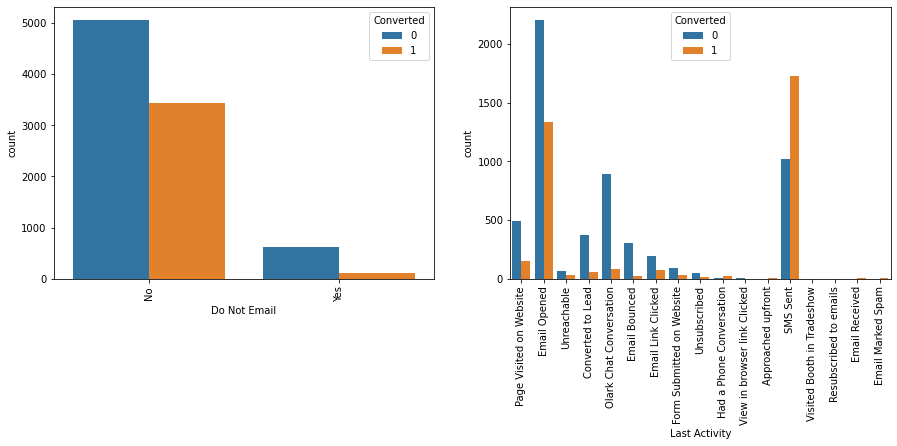

In [337]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot('Do Not Email',hue='Converted',data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot('Last Activity',hue='Converted',data=data)
plt.xticks(rotation=90)
plt.show()



as we can see generation and convertion rate of leads in 'Do Not Email' no is high

#### Leads generation rate of email opened is high whereas,leads conversion rate of sms sent is high. we need to focus on Olark chat Conversation

### Specialization and current occupation

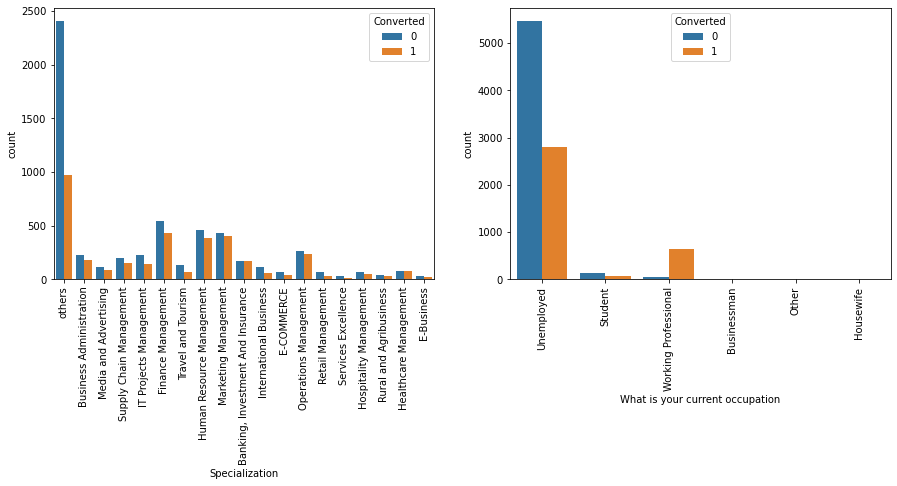

In [338]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot('Specialization',hue='Converted',data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot('What is your current occupation',hue='Converted',data=data)
plt.xticks(rotation=90)
plt.show()



from the data of specialization we can see that leads generation rate of others is high whereas, conversion rate of 'banking,investment and insurance' and healthcare managemnet is high. we need to focus on others.
##### leads generation rate of unemployed in 'what is your current occupation' is high whereas, conversion rate of working professional is high

#### Tags

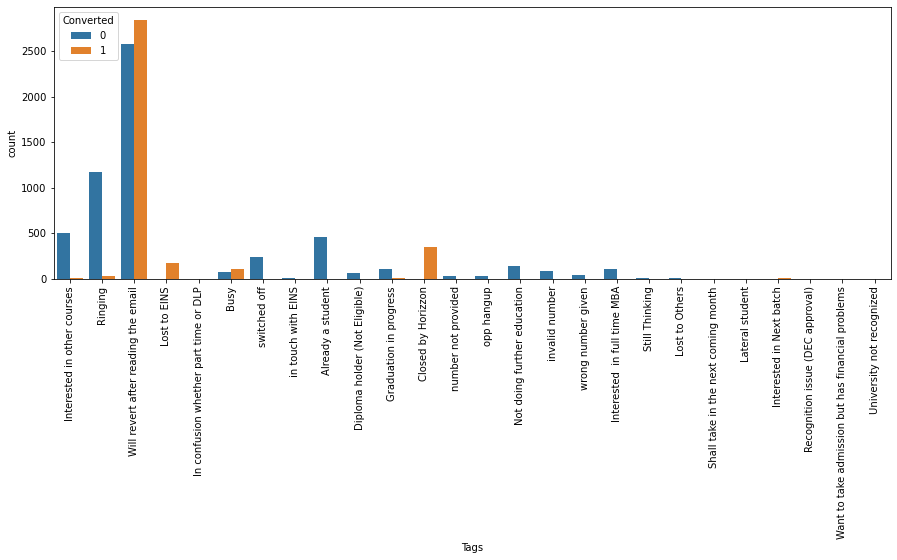

In [339]:
plt.figure(figsize=[15,5])
sns.countplot('Tags',hue='Converted',data=data)
plt.xticks(rotation=90)
plt.show()

 we can see that leads generation rate of 'will revert after back after reading email' is high and leads conversion rate of Closed by Horizon,Lost to ENS,'will revert after back after reading email' is high.

## Data Prepration

In [340]:
data.head(4)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,248,0.0,Page Visited on Website,others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,others,Unemployed,Ringing,not sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified


In [341]:

# List of variables to map

varlist=['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

### Create dummies for multilevel categorical variable

In [342]:
dumm1 = pd.get_dummies(data[['Lead Origin','Lead Source','Last Activity','Specialization',
                             'What is your current occupation','Tags','City','Last Notable Activity','Lead Quality']],drop_first=True)
dumm1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_not sure
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [343]:
# adding dummies to data
data = pd.concat([data,dumm1],axis=1)

In [344]:
data=data.drop(['Lead Origin','Lead Source','Last Activity','Specialization',
                             'What is your current occupation','Tags','City','Last Notable Activity','Lead Quality'],axis=1)

In [345]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_not sure
0,0,0,0.0,248,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [346]:
X=data.drop('Converted',axis=1)

In [347]:
Y=data['Converted']

## Split the data into train and test

In [348]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=54)

### scale the data using standard scaler

In [349]:
scaler = StandardScaler()

x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_not sure
8430,0,-1.140813,-0.703169,-1.160969,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4942,0,-0.060043,1.736408,0.342700,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6805,0,2.461754,2.102784,3.851260,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6030,0,-0.780556,-0.503528,-0.659746,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2570,0,-1.140813,-0.703169,-1.160969,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,.

In [350]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted # total converted rate

38.53896103896104

## Model building

##### Running Your First Training Mode

In [351]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                          109
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 27 Dec 2022   Deviance:                       69814.
Time:                        20:21:12   Pearson chi2:                 3.41e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1.203e+15   6.45e+07   1.86e+07      0.000     1.2e+15     1.2e+15
Do Not Email                                           -1.712e+14   4.42e+06  -3.88e+07      0.000   -1.71e+14   -1.71e+14
TotalVisits                                             5.769e+13   1.45e+06   3.98e+07      0.000    5.77e+13    5.77e+13
Total Time Spent on Website                            -7.656e+13   9.58e+05  -7.99e+07      0.000   -7.66e+13   -7.66e+13
Page Views Per Visit                                   -3.939e+13   1.47e+06  -2.68e+07      0.000   -3.94e+13   -3.94e+13
Lead Origin_Landing Page Submission                     -1.94e+14   3.38e+06  -5.74e+07      0.000   -1.94e+14   -1.94e+14
Lead Origin_Lead Add Form                              -1.677e+13   1.28e+07  -1.31e+06      0.000   -1.68e+13   -1.68e+13
Lead Origin_Lead Import                                -3.676e+15    6.9e+07  -5.33e+07      0.000   -3.68e+15   -3.68e+15
Lead Origin_Quick Add Form                              1.049e+16    6.8e+07   1.54e+08      0.000    1.05e+16    1.05e+16
Lead Source_Direct Traffic                              9.338e+14   5.39e+07   1.73e+07      0.000    9.34e+14    9.34e+14
Lead Source_Facebook                                    4.649e+15    8.8e+07   5.28e+07      0.000    4.65e+15    4.65e+15
Lead Source_Google                                      9.398e+14   5.38e+07   1.75e+07      0.000     9.4e+14     9.4e+14
Lead Source_Live Chat                                   4.569e+15   8.52e+07   5.36e+07      0.000    4.57e+15    4.57e+15
Lead Source_NC_EDM                                      -111.7160   1.87e-06  -5.97e+07      0.000    -111.716    -111.716
Lead Source_Olark Chat                                  1.332e+15    5.4e+07   2.47e+07      0.000    1.33e+15    1.33e+15
Lead Source_Organic Search                              8.827e+14   5.39e+07   1.64e+07      0.000    8.83e+14    8.83e+14
Lead Source_Pay per Click Ads                          -2.412e+15   8.62e+07   -2.8e+07      0.000   -2.41e+15   -2.41e+15
Lead Source_Press_Release                              -1.748e+15   8.65e+07  -2.02e+07      0.000   -1.75e+15   -1.75e+15
Lead Source_Reference                                   8.668e+14   5.25e+07   1.65e+07      0.000    8.67e+14    8.67e+14
Lead Source_Referral Sites                              9.481e+14   5.43e+07   1.75e+07      0.000    9.48e+14    9.48e+14
Lead Source_Social Media                                5.522e+15   8.62e+07    6.4e+07      0.000    5.52e+15    5.52e+15
Lead Source_WeLearn                                     4.645e+15   8.62e+07   5.39e+07      0.000    4.65e+15    4.65e+15
Lead Sou

#### Feature Selection Using RFE

In [352]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(x_train, y_train)

In [353]:
rfe.support_
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 5),
 ('TotalVisits', False, 48),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 47),
 ('Lead Origin_Landing Page Submission', False, 30),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 63),
 ('Lead Origin_Quick Add Form', False, 31),
 ('Lead Source_Direct Traffic', False, 59),
 ('Lead Source_Facebook', False, 67),
 ('Lead Source_Google', False, 65),
 ('Lead Source_Live Chat', False, 94),
 ('Lead Source_NC_EDM', False, 99),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 66),
 ('Lead Source_Pay per Click Ads', False, 98),
 ('Lead Source_Press_Release', False, 97),
 ('Lead Source_Reference', False, 27),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 84),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 43),
 ('Lead Source_blog', False, 101),
 ('Lead Source_testone', False, 96),
 ('

In [354]:
col = x_train.columns[rfe.support_]
col
x_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google',
       ...
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Not Sure'],
      dtype='object', length=101)

#### Assessing the model with StatsModels

### Model 1

In [355]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()# here we can see that there are some p value is above 0.5 . we need to delete 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1561.8
Date:                Tue, 27 Dec 2022   Deviance:                       3123.5
Time:                        20:21:33   Pearson chi2:                 5.53e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.4854      0.206    -12.053      0.000      -2.890      -2.081
Lead Origin_Lead Add Form                    1.2036      0.341      3.526      0.000       0.534       1.873
Lead Source_Welingak Website                 4.1232      1.068      3.859      0.000       2.029       6.217
Tags_Busy                                    2.0327      0.312      6.512      0.000       1.421       2.645
Tags_Closed by Horizzon                      9.0017      0.769     11.704      0.000       7.494      10.509
Tags_Lost to EINS                           10.0923      0.778     12.974      0.000       8.568      11.617
Tags_Ringing                                -2.0326      0.306     -6.646      0.000      -2.632      -1.433
Tags_Will revert after reading the email     4.7970      0.238     20.120      0.000       4.330       5.264
Tags_in touch with EINS                      3.0186      0.896      3.367      0.001       1.262       4.775
Tags_invalid number                        -23.1300   2.23e+04     -0.001      0.999   -4.38e+04    4.37e+04
Tags_number not provided                   -24.3001    4.1e+04     -0.001      1.000   -8.04e+04    8.04e+04
Tags_switched off                           -2.7788      0.564     -4.931      0.000      -3.883      -1.674
Tags_wrong number given                    -24.0851   3.04e+04     -0.001      0.999   -5.95e+04    5.95e+04
Last Notable Activity_SMS Sent               2.6434      0.122     21.753      0.000       2.405       2.882
Lead Quality_Worst                          -4.4732      1.225     -3.651      0.000      -6.875      -2.072
Lead Quality_not sure                       -4.0194      0.139    -28.992      0.000      -4.291      -3.748
============================================================================================================
"""

#### delete features on the basis of
- 1 if p  value>=0.5 and VIF >= 5 
- 2 if p value>=0.5 and VIF<=5
- 3 if p value <=5 and VIF>=5
- 4 If p value <=5 and VIF<=5(SIgnificant)

In [372]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif# vif of all the features is above 5 means there is no multicollinearity between independent variables.But p value is high .
#so, on the basis of 2nd condition .we delete the column with high p value

,Features,VIF
1,Lead Source_Welingak Website,1.31
3,Tags_Closed by Horizzon,1.19
10,Tags_switched off,1.05
2,Tags_Busy,1.03
4,Tags_Lost to EINS,1.03
8,Tags_invalid number,1.02
11,Tags_wrong number given,1.01
7,Tags_in touch with EINS,1.00
9,Tags_number not provided,1.00
0,Lead Origin_Lead Add Form,0.78


In [397]:
col1 = col.drop(['Tags_number not provided'],1)# drop the column 'Tags_number not provided'

### Model 2

In [398]:
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()# here the Tags_invalid number p value is high. now check for vif

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1566.8
Date:                Tue, 27 Dec 2022   Deviance:                       3133.6
Time:                        20:39:25   Pearson chi2:                 5.40e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6391      0.208    -12.663      0.000      -3.048      -2.231
Lead Origin_Lead Add Form                    1.2289      0.343      3.586      0.000       0.557       1.901
Lead Source_Welingak Website                 4.0934      1.069      3.830      0.000       1.999       6.188
Tags_Busy                                    2.1972      0.312      7.042      0.000       1.586       2.809
Tags_Closed by Horizzon                      9.1432      0.770     11.875      0.000       7.634      10.652
Tags_Lost to EINS                           10.2290      0.778     13.154      0.000       8.705      11.753
Tags_Ringing                                -1.8488      0.304     -6.082      0.000      -2.445      -1.253
Tags_Will revert after reading the email     4.9505      0.240     20.608      0.000       4.480       5.421
Tags_in touch with EINS                      3.1757      0.897      3.540      0.000       1.417       4.934
Tags_invalid number                        -22.9496   2.24e+04     -0.001      0.999   -4.38e+04    4.38e+04
Tags_switched off                           -2.5927      0.562     -4.610      0.000      -3.695      -1.490
Tags_wrong number given                    -23.9033   3.04e+04     -0.001      0.999   -5.96e+04    5.96e+04
Last Notable Activity_SMS Sent               2.6077      0.120     21.745      0.000       2.373       2.843
Lead Quality_Worst                          -4.4072      1.253     -3.516      0.000      -6.864      -1.951
Lead Quality_not sure                       -4.0118      0.138    -28.968      0.000      -4.283      -3.740
============================================================================================================
"""

In [403]:
vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values, i) for i in range(x_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif# VIF is significant. so on the basis of p value drop Tags_invalid number

,Features,VIF
1,Lead Source_Welingak Website,1.31
3,Tags_Closed by Horizzon,1.19
9,Tags_switched off,1.05
2,Tags_Busy,1.03
4,Tags_Lost to EINS,1.03
8,Tags_invalid number,1.02
10,Tags_wrong number given,1.01
7,Tags_in touch with EINS,1.00
0,Lead Origin_Lead Add Form,0.78
12,Lead Quality_Worst,0.37


In [404]:
col2 = col1.drop(['Tags_invalid number'],1)

### Model 3

In [405]:
x_train_sm = sm.add_constant(x_train[col2])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()# here p value of Tags_wrong number given is high . check for vif

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1571.5
Date:                Tue, 27 Dec 2022   Deviance:                       3143.1
Time:                        20:44:06   Pearson chi2:                 5.33e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7889      0.210    -13.310      0.000      -3.200      -2.378
Lead Origin_Lead Add Form                    1.2526      0.344      3.640      0.000       0.578       1.927
Lead Source_Welingak Website                 4.0663      1.069      3.803      0.000       1.971       6.162
Tags_Busy                                    2.3558      0.311      7.566      0.000       1.746       2.966
Tags_Closed by Horizzon                      9.2849      0.770     12.052      0.000       7.775      10.795
Tags_Lost to EINS                           10.3754      0.778     13.330      0.000       8.850      11.901
Tags_Ringing                                -1.6751      0.302     -5.550      0.000      -2.267      -1.084
Tags_Will revert after reading the email     5.1011      0.241     21.169      0.000       4.629       5.573
Tags_in touch with EINS                      3.3285      0.898      3.708      0.000       1.569       5.088
Tags_switched off                           -2.4171      0.561     -4.307      0.000      -3.517      -1.317
Tags_wrong number given                    -22.7297   1.85e+04     -0.001      0.999   -3.62e+04    3.62e+04
Last Notable Activity_SMS Sent               2.5793      0.119     21.727      0.000       2.347       2.812
Lead Quality_Worst                          -4.4120      1.250     -3.528      0.000      -6.863      -1.961
Lead Quality_not sure                       -4.0068      0.138    -28.958      0.000      -4.278      -3.736
============================================================================================================
"""

In [406]:
vif = pd.DataFrame()
vif['Features'] = x_train[col2].columns
vif['VIF'] = [variance_inflation_factor(x_train[col2].values, i) for i in range(x_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif# vif is still significant. now on the basis of high p value drop Tags_wrong number given

,Features,VIF
1,Lead Source_Welingak Website,1.31
3,Tags_Closed by Horizzon,1.19
9,Tags_switched off,1.05
2,Tags_Busy,1.03
4,Tags_Lost to EINS,1.03
8,Tags_invalid number,1.02
10,Tags_wrong number given,1.01
7,Tags_in touch with EINS,1.00
0,Lead Origin_Lead Add Form,0.78
12,Lead Quality_Worst,0.37


In [409]:
col3=col2.drop(['Tags_wrong number given'],1)

### Model 4

In [410]:
x_train_sm = sm.add_constant(x_train[col3])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()# here all the p value is significant. now check for vif

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1577.1
Date:                Tue, 27 Dec 2022   Deviance:                       3154.2
Time:                        20:48:06   Pearson chi2:                 5.26e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9666      0.211    -14.069      0.000      -3.380      -2.553
Lead Origin_Lead Add Form                    1.2803      0.346      3.703      0.000       0.603       1.958
Lead Source_Welingak Website                 4.0346      1.070      3.772      0.000       1.938       6.131
Tags_Busy                                    2.5438      0.311      8.192      0.000       1.935       3.152
Tags_Closed by Horizzon                      9.4505      0.771     12.256      0.000       7.939      10.962
Tags_Lost to EINS                           10.5357      0.778     13.544      0.000       9.011      12.060
Tags_Ringing                                -1.4695      0.299     -4.911      0.000      -2.056      -0.883
Tags_Will revert after reading the email     5.2785      0.242     21.812      0.000       4.804       5.753
Tags_in touch with EINS                      3.5093      0.898      3.907      0.000       1.749       5.270
Tags_switched off                           -2.2090      0.560     -3.948      0.000      -3.306      -1.112
Last Notable Activity_SMS Sent               2.5459      0.118     21.667      0.000       2.316       2.776
Lead Quality_Worst                          -4.3390      1.283     -3.382      0.001      -6.853      -1.825
Lead Quality_not sure                       -3.9995      0.138    -28.934      0.000      -4.270      -3.729
============================================================================================================
"""

In [411]:
vif = pd.DataFrame()
vif['Features'] = x_train[col3].columns
vif['VIF'] = [variance_inflation_factor(x_train[col3].values, i) for i in range(x_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.31
3,Tags_Closed by Horizzon,1.19
8,Tags_switched off,1.04
2,Tags_Busy,1.03
4,Tags_Lost to EINS,1.03
7,Tags_in touch with EINS,1.00
0,Lead Origin_Lead Add Form,0.78
10,Lead Quality_Worst,0.37
9,Last Notable Activity_SMS Sent,0.20
6,Tags_Will revert after reading the email,0.16


Here we can see that all the p value and VIf is significant . so, we can consider it as a final model.

In [415]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

8430    0.156097
4942    0.992292
6805    0.156097
6030    0.156097
2570    0.909860
1532    0.000671
8379    0.000104
3937    0.909860
8392    0.702313
3214    0.156097
dtype: float64

In [416]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]# reshaping the predicted values

array([1.56096520e-01, 9.92292489e-01, 1.56096520e-01, 1.56096520e-01,
       9.09859657e-01, 6.71333124e-04, 1.03574958e-04, 9.09859657e-01,
       7.02312987e-01, 1.56096520e-01])

In [386]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()# here we get the converted probability of all the leads

,Converted,Converted_prob,Prospect ID
0,0,0.156097,8430
1,1,0.992292,4942
2,1,0.156097,6805
3,0,0.156097,6030
4,1,0.909860,2570


In [387]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head() # on the basis of converted_probability assign a new predicted converted leads

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.156097,8430,0
1,1,0.992292,4942,1
2,1,0.156097,6805,0
3,0,0.156097,6030,0
4,1,0.909860,2570,1


In [417]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3814  154]
 [ 366 2134]]


In [389]:
# Predicted     not_churn    churn
# Actual
# not_churn        3841      127
# churn            796       1704  

In [390]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9196042053184911


## Metrics beyond simply accuracy

In [418]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [419]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN) # senstivity is good

0.8536

In [420]:
# Let us calculate specificity
TN / float(TN+FP)

0.9611895161290323

In [421]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))# false predictive rate is low which is good

0.03881048387096774


In [395]:
# positive predictive value 
print (TP / float(TP+FP))# 

0.9326923076923077


In [396]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9124401913875598


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [422]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [423]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

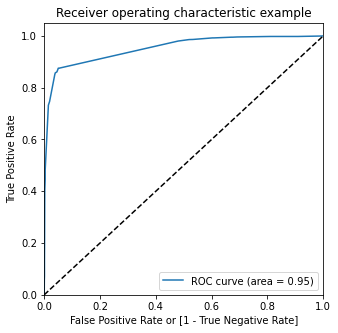

In [424]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- on the basis of above condition the obtained ROC curve is good in terms of accuracy

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [425]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.156097,8430,0,1,1,0,0,0,0,0,0,0,0
1,1,0.992292,4942,1,1,1,1,1,1,1,1,1,1,1
2,1,0.156097,6805,0,1,1,0,0,0,0,0,0,0,0
3,0,0.156097,6030,0,1,1,0,0,0,0,0,0,0,0
4,1,0.909860,2570,1,1,1,1,1,1,1,1,1,1,1


In [426]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy   sensi     speci
0.0   0.0  0.386518  1.0000  0.000000
0.1   0.1  0.675943  0.9860  0.480595
0.2   0.2  0.920532  0.8752  0.949093
0.3   0.3  0.920377  0.8748  0.949093
0.4   0.4  0.919604  0.8536  0.961190
0.5   0.5  0.919604  0.8536  0.961190
0.6   0.6  0.919604  0.8536  0.961190
0.7   0.7  0.919604  0.8528  0.961694
0.8   0.8  0.890538  0.7480  0.980343
0.9   0.9  0.886054  0.7288  0.985131


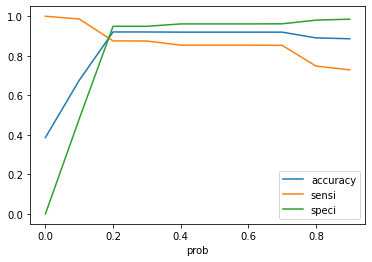

In [427]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [428]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.156097,8430,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.992292,4942,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.156097,6805,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.156097,6030,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.909860,2570,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

In [429]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.156097,8430,0,1,1,0,0,0,0,0,0,0,0,0,16
1,1,0.992292,4942,1,1,1,1,1,1,1,1,1,1,1,1,99
2,1,0.156097,6805,0,1,1,0,0,0,0,0,0,0,0,0,16
3,0,0.156097,6030,0,1,1,0,0,0,0,0,0,0,0,0,16
4,1,0.909860,2570,1,1,1,1,1,1,1,1,1,1,1,1,91


In [481]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9205318491032777

In [482]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3766,  202],
       [ 312, 2188]], dtype=int64)

In [483]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [484]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8752

In [485]:
# Let us calculate specificity
TN / float(TN+FP)

0.9490927419354839

In [486]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05090725806451613


In [487]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9154811715481171


In [488]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9234919077979402


## Precision and Recall

In [489]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3814,  154],
       [ 366, 2134]], dtype=int64)

In [490]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9326923076923077

In [491]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8536

Using sklearn utilities for the same

In [492]:
from sklearn.metrics import precision_score, recall_score

In [440]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9326923076923077

In [441]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8536

### Precision and recall tradeoff

In [442]:
from sklearn.metrics import precision_recall_curve

In [443]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       0
 4       1
        ..
 6463    1
 6464    0
 6465    0
 6466    1
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6463    0
 6464    0
 6465    0
 6466    1
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [444]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

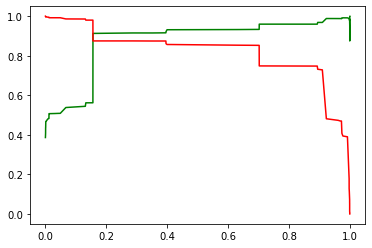

In [445]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [447]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,...,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_not sure
8430,0,-1.140813,-0.703169,-1.160969,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4942,0,-0.060043,1.736408,0.342700,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6805,0,2.461754,2.102784,3.851260,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6030,0,-0.780556,-0.503528,-0.659746,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2570,0,-1.140813,-0.703169,-1.160969,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,.

In [448]:
x_test = x_test[col3]
x_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_SMS Sent,Lead Quality_Worst,Lead Quality_not sure
543,0,0,0,0,0,0,0,0,1,0,0,0
1941,0,0,0,0,0,0,0,0,0,0,0,0
2430,0,0,0,0,0,0,1,0,0,0,0,1
1358,0,0,0,0,0,0,1,0,0,0,0,1
2143,0,0,0,0,0,0,1,0,0,0,0,1


In [450]:
x_test_sm = sm.add_constant(x_test)

Making predictions on the test set

In [452]:
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

543     0.005621
1941    0.048959
2430    0.156097
1358    0.156097
2143    0.156097
2129    0.156097
2777    0.000942
2207    0.156097
5468    0.156097
8815    0.000217
dtype: float64

In [453]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [454]:
# Let's see the head
y_pred_1.head()

,0
543,0.005621
1941,0.048959
2430,0.156097
1358,0.156097
2143,0.156097


In [455]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [456]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [457]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [458]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [459]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,543,0.005621
1,0,1941,0.048959
2,0,2430,0.156097
3,1,1358,0.156097
4,0,2143,0.156097


In [460]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [472]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

In [473]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,543,0,0.005621
1,1941,0,0.048959
2,2430,0,0.156097
3,1358,1,0.156097
4,2143,0,0.156097


In [474]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [475]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,543,0,0.005621,0
1,1941,0,0.048959,0
2,2430,0,0.156097,0
3,1358,1,0.156097,0
4,2143,0,0.156097,0


In [476]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9227994227994228

In [477]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1608,  103],
       [ 111,  950]], dtype=int64)

In [478]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [479]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8953817153628653

In [480]:
# Let us calculate specificity
TN / float(TN+FP)

0.9398012857977791

### Result

 #### for train dataset
ACCURACY - 91.96% 

SENSITIVITY - 85.36% 

SPECIFICITY - 96.99%

PRECISION- 93.26%

RECALL- 85.36%
  #### for test dataset

ACCURACY – 92.27% 

SENSITIVITY – 89.53% 

SPECIFICITY – 93.98%


The model is performing well for train as well as for the test data set 